# Capstone Analytic
## Suicide Rates Examined

Being examined is data from the World Health Organization on reported suicides. The data is reported by country (142 total), year (1979-2016), gender, age group, total number of suicides and total number of living persons. There are 43777 rows of data in the dataset that can be examined. It is important to note that China, India and Indonesia, the first, second and fourth most populous countries, are not included in this data set. Conclusions can't be drawn about the suicide rates due to high or low populations due to this missing data.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# upload dataset and use it to create a dataframe
df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\suicideData1.csv")


## General Examination of the Data

In [97]:
# remove all values that are not numeric
df = df.dropna()
# print the first few rows of the dataset
print(df.head())

    country  year     sex          age  suicides_no  population
24  Albania  1987  female  05-14 years          0.0    311000.0
25  Albania  1987  female  15-24 years         14.0    289700.0
26  Albania  1987  female  25-34 years          4.0    257200.0
27  Albania  1987  female  35-54 years          6.0    278800.0
28  Albania  1987  female  55-74 years          0.0    144600.0


We can see clearly how the data is grouped by looking at a few lines from the dataset. Each country is broken down by year. The data is then seperated again by gender and further more by age group. With this data values are then assigned to the number of suicides and the total population for the group.

In [98]:
# print a basic statistical description of the overall dataset
print(df.describe())
# calculate and print the variance for the suicides_no for the entire dataset
print("Suicides Numbers Variance: ", df['suicides_no'].var())

               year   suicides_no    population
count  36060.000000  36060.000000  3.606000e+04
mean    1998.935441    221.809956  1.699996e+06
std       10.163883    855.449442  3.697811e+06
min     1979.000000      0.000000  2.590000e+02
25%     1991.000000      2.000000  8.056600e+04
50%     2000.000000     21.000000  3.757650e+05
75%     2008.000000    116.000000  1.344900e+06
max     2016.000000  22338.000000  4.380521e+07
Suicides Numbers Variance:  731793.7484851474


With this simple overview of the data we can see that the mean number of suicides is 193 with 0 being the lowest report and 22338 being the highest report. We must keep in mind that this data is further broken down by age and sex so it doesn't give an overall view of what the mean and maximum value are if we were just considering the amount by year.
The maximum value that we are seeing is interestingly high considering that the mean in 193 and the maximum is 22338. The standard deviation and variance are also very high at 801 and 640944. It would be useful to look at the outliers for this dataset.

(array([3.434e+04, 9.140e+02, 3.300e+02, 1.420e+02, 9.800e+01, 7.200e+01,
        3.400e+01, 3.500e+01, 3.300e+01, 1.300e+01, 1.400e+01, 1.200e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        3.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000, 20000, 21000, 22000, 23000]),
 <a list of 23 Patch objects>)

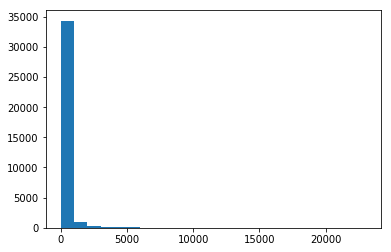

In [99]:
# create a histogram showing the distribution of the suicies_no for the entire dataset broken into specifc bins
plt.hist(df['suicides_no'], bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 
                                    13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000])

It is difficult to see the exact distribution of the data since there aren't a significant number of large values compared to the values under 1000. We will look at the square root of the suicide numbers to better visualize the data overall.

(array([2.6219e+04, 5.9340e+03, 1.9620e+03, 9.8600e+02, 3.4100e+02,
        2.5300e+02, 1.1500e+02, 9.7000e+01, 6.5000e+01, 3.9000e+01,
        2.7000e+01, 4.0000e+00, 3.0000e+00, 7.0000e+00, 8.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

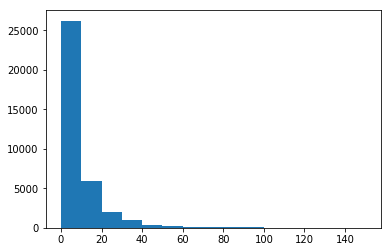

In [100]:
# transform the data by taking the square root of all of the suicides_no
df['sqrtSuicides'] = np.sqrt(df['suicides_no'])
# create a histogram of the distribution of the square root of the suicides_no 
# for the entire dataset broken into specific bins
plt.hist(df['sqrtSuicides'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

We can see with this data transformation that the majority of the data is still mostly low in value with the larger values comprising a small portion of the overall data. The highest numbers are between 0 and 10 which would mean that the actual data, before the transformation, is mostly between 0 and 100 suicides per group (country, year, gender and age range).

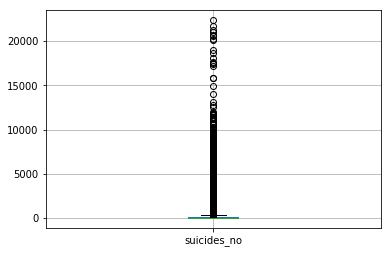

In [101]:
# create a box plot of the suicides_no to see the spread of the data
df.boxplot('suicides_no')

Since most of the data is contained in the 0 to 100 suicides range and there are so many outliers in such a large range (below 1000 to above 20000) it is useful to include the boxplot with the outliers removed. This will let us visually understand the large distribution of the outliers as well as the distribution of the quartiles.

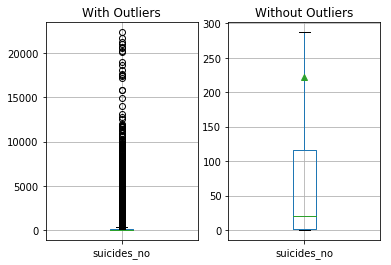

In [102]:
plt.subplot(1, 2, 1)
plt.title('With Outliers')
# create a box plot of the suicides_no to see the spread of the data
df.boxplot('suicides_no')
plt.subplot(1, 2, 2)
plt.title('Without Outliers')
# create a box plot of the suicides_no to see the spread of the data with the outliers removed
df.boxplot('suicides_no', showfliers = False, showmeans = True)

We can see that the outliers are so great that the mean (the green arrow) is quite far outside of the interquartile range. What will the data look like if instead of looking at just the overall suicide numbers, we looked at the suicides per capita (suicide_no/population)?

               year   suicides_no    population  sqrtSuicides     perCapita
count  36060.000000  36060.000000  3.606000e+04  36060.000000  36060.000000
mean    1998.935441    221.809956  1.699996e+06      8.573809      0.000132
std       10.163883    855.449442  3.697811e+06     12.178007      0.000199
min     1979.000000      0.000000  2.590000e+02      0.000000      0.000000
25%     1991.000000      2.000000  8.056600e+04      1.414214      0.000008
50%     2000.000000     21.000000  3.757650e+05      4.582576      0.000060
75%     2008.000000    116.000000  1.344900e+06     10.770330      0.000170
max     2016.000000  22338.000000  4.380521e+07    149.459024      0.003008
Suicides Numbers Variance:  731793.7484851474
Per Capita Variance:  3.961121143414038e-08


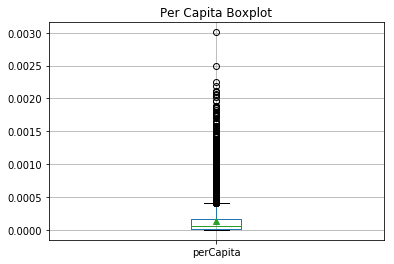

In [103]:
# create a new column with the calculated value of suicides per capita
df['perCapita'] = df['suicides_no']/df['population']
# print a basic statistical description of the overall dataset including the per capita data
print(df.describe())
# calculate and print the variance for the suicides per capita and the raw suicides_no
print("Suicides Numbers Variance: ", df['suicides_no'].var())
print("Per Capita Variance: ", df['perCapita'].var())
plt.title('Per Capita Boxplot')
# create a box plot of the suicides per capita to see the distribution of the data
df.boxplot('perCapita', showmeans = True)

With this new column of Per Capita values added we can see that the maximum value of the overall suicides reported is about 115 times greater than the mean, while the maximum value of the per capita suicides is only around 2 times larger than the mean. Although there are some outliers in the boxplot for the per capita data, we can easily visualize the interquartile range which was impossible to do with the overall suicide numbers. The mean is also within the interquartile range. The variance for the per capita suicide data is also much lower than the variance for the overall suicide numbers. It would be better to look at the per capita values to account for the differences in populations throughout the dataset.

## Per Capita in More Detail

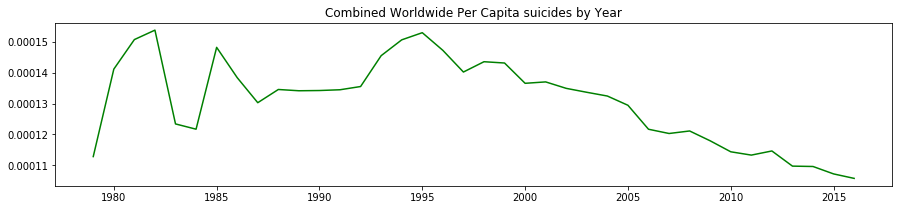

In [104]:
# create a new dataframe with the data grouped by year and then sum the data
dfYear = df.groupby(['year']).sum()
# reset the index for the Year dataframe so that 'year' is included as the name of a column
dfYear = dfYear.reset_index()
# recalculate the suicides per capita for the summed Year dataframe instead of the summed value of the per capita data
# from the original dataset
dfYear['perCapita'] = dfYear['suicides_no']/dfYear['population']
# adjust the figure size
plt.figure(figsize = (15,3))

plt.title('Combined Worldwide Per Capita suicides by Year')
# create a plot for year and per capita suicides from the Year dataframe
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

Once the year data is taken with the summed numbers, we are left with only the total number of suicides and the total population for the period. We then calculate the new per Capita suicides and plot the results by year. We can see that the plot is much more even looking with less extreme spikes and dips. The highest values are for 1982, 1995, 1981 and 1994. The lowest values are for 2016, 2015, 2014 and 2013.

<BarContainer object of 2 artists>

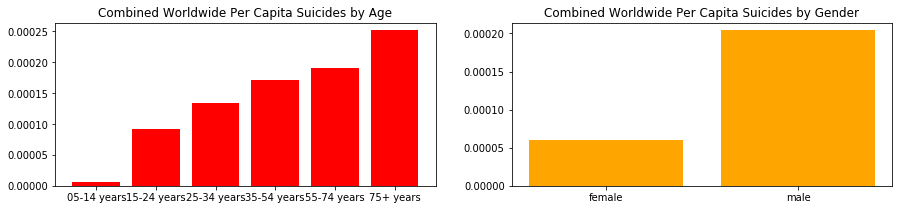

In [105]:
# create a new dataframe with the data grouped by age and then summ the data
dfAge = df.groupby(['age']).sum()
# reset the index for the Year dataframe so that 'age' is included as the name of a column
dfAge = dfAge.reset_index()
# recalculate the suicides per capita for the summed Age dataframe instead of the summed value of the per capita data
# from the original dataset
dfAge['perCapita'] = dfAge['suicides_no']/dfAge['population']

# create a new dataframe with the data grouped by sex and then sum the data
dfSex = df.groupby(['sex']).sum()
# reset the index for the Year dataframe so that 'sex' is included as the name of a column
dfSex = dfSex.reset_index()
# recalculate the suicides per capita for the summed sex dataframe instead of the summed value of the per capita data
# from the original dataset
dfSex['perCapita'] = dfSex['suicides_no']/dfSex['population']

# adjust the figure size
plt.figure(figsize = (15,3))

# create a subplot
plt.subplot(1,2,1)
plt.title("Combined Worldwide Per Capita Suicides by Age")
# create a plot for year and per capita suicides from the Age dataframe
plt.bar(dfAge['age'], dfAge['perCapita'], color = "red")

# create a subplot
plt.subplot(1,2,2)
plt.title("Combined Worldwide Per Capita Suicides by Gender")
# create a plot for year and per capita suicides from the sex dataframe
plt.bar(dfSex['sex'], dfSex['perCapita'], color = "orange")

Although the highest group is still 75 + years the second highest group is now 55 - 74 years. The data trends that the older the person is the more likely they are to commit suicide. Males are still far more likely to commit suicide than females.

<BarContainer object of 118 artists>

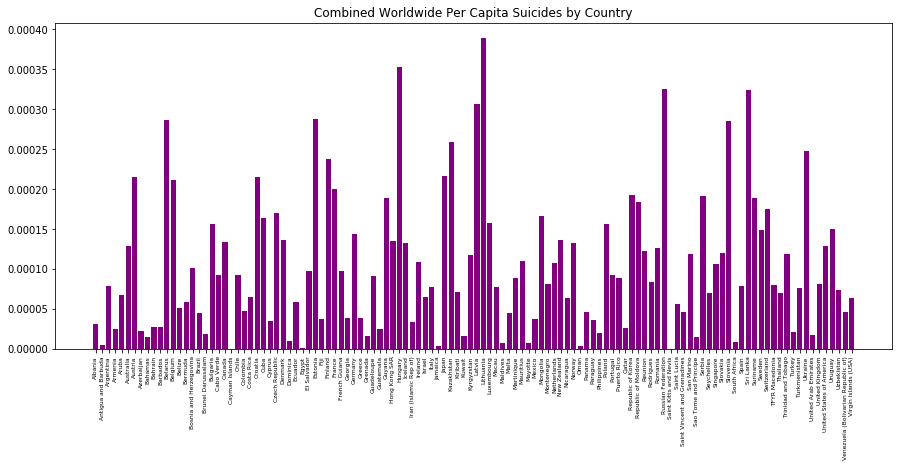

In [106]:
# create a new dataframe with the data grouped by country and then sum the data
dfCountry = df.groupby(['country']).sum()
# reset the index for the Year dataframe so that 'country' is included as the name of a column
dfCountry = dfCountry.reset_index()
# recalculate the suicides per capita for the summed sex dataframe instead of the summed value of the per capita data
# from the original dataset
dfCountry['perCapita'] = dfCountry['suicides_no']/dfCountry['population']

# adjust the figure size
plt.figure(figsize = (15,6))
# rotate the lables on the x-axix 90 degrees
plt.xticks(fontsize = 6, rotation = 90)

plt.title("Combined Worldwide Per Capita Suicides by Country")
# create a plot for year and per capita suicides from the country dataframe
plt.bar(dfCountry['country'], dfCountry['perCapita'], color = "purple")

After we group the values in the data by their country and then add all the values, we now have only the columns year, suicide number, population and per capita. We then recalculate the per capita suicide numbers from the sum of the overall suicides and population. The new plot looks very different from the plot by country with the raw data. We find that the countries with the highest per capita rates over the entire 38-year period regardless of age or gender are now Lithuania, Hungary, the Russian Federation and Sri Lanka. The lowest are Cayman Islands, Saint Kitts and Nevis, Egypt and Oman.

## Per Capita in More Detail Summary

Since the trends with age and gender are so clear, further investigation seems unlikely to yield any different results. The data does very greatly for country and year without a clear trend except for a current downward trend from 2013-2016 and generally from 2000-2016. What will the data show when we visualize just the highest four countries for per capita suicides by year?

## Country and Year Examination

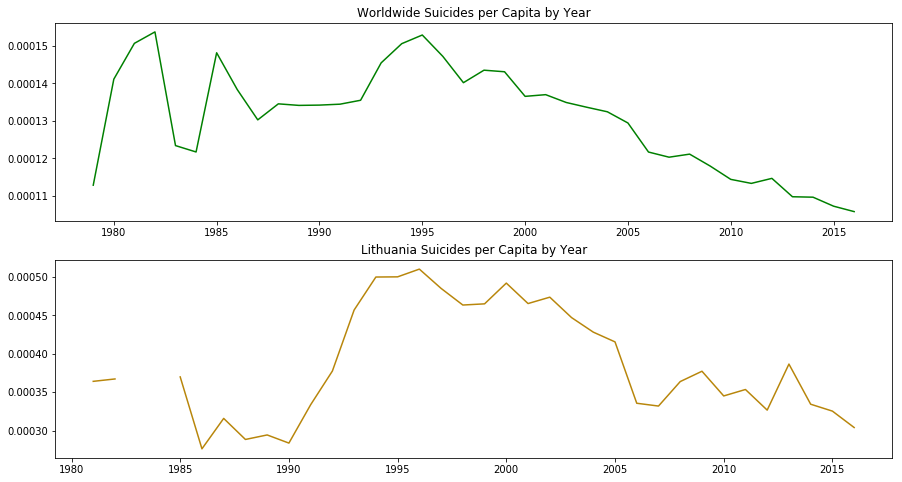

In [107]:
# create variables for the year and the per capita data points
y = 1979
pc = 0

# create empty lists and dictionary
listYear = list()
listPerCapita = list()
comboDict = {}

# remove warnings for warning that occurs when the float values are so small that it is equivalent to dividing 0 by 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # create a loop that terminates when y is greater than 2017 
    while y < 2017:
        # create a dataframe by using .loc to find all values that have the country equal to Lithuania
        # and the year equal to the current value of y
        dfLithuania = df.loc[(df['country'] == 'Lithuania') & (df['year'] == y)]
        # assign the value of pc as the sum of the suicides_no divided by the sum of the poplulation number for the 
        # Lithuatina dataframe
        pc = dfLithuania['suicides_no'].sum()/dfLithuania['population'].sum()
        # add the current value of y to the list of years
        listYear.append(y)
        # add the current value pc to the list of per capita suicides
        listPerCapita.append(pc)
        # combined the lists to create a dictionary
        comboDict = {'year': listYear,'perCapita':listPerCapita}
        # use the dictionary to create a dataframe
        dfYearPerCapita  = pd.DataFrame(comboDict)
        # increment the year
        y = y + 1   

# adjust the figure size
plt.figure(figsize = (15,8))

# create a subplot
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
# create a plot of the year and worldwide per capita suicides for the Year dataframe created above
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

# create a subplot
plt.subplot(2,1,2)
plt.title('Lithuania Suicides per Capita by Year')
# create a plot of the year and Lithuania per capita suicides for the Lithuania dataframe
plt.plot(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

We recall that the highest years for suicide across all countries were 1982, 1995, 1991 and 1991. This plot shows that there is some correlation between the country with the highest suicide rates, Lithuania, and worldwide suicide rates. Lithuania had the most suicides in 1996 which isn't on the top worldwide years, but Lithuania does have high rates for 1995 and 1994. 

While there was a spike in the suicide rates through the 1990s, we do see a general downward trend after 2000 with a few spikes.

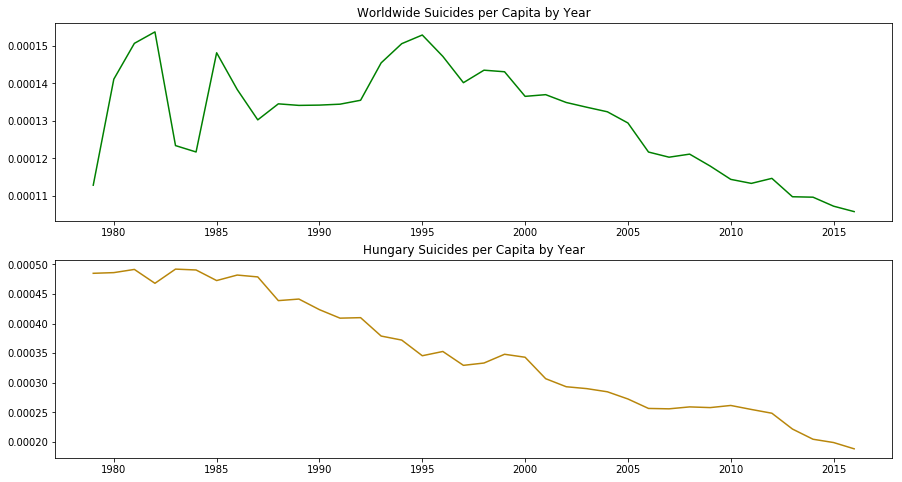

In [108]:
# create variables for the year and the per capita data points
y = 1979
pc = 0

# create empty lists and dictionary
listYear = list()
listPerCapita = list()
comboDict = {}

# remove warnings for warning that occurs when the float values are so small that it is equivalent to dividing 0 by 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # create a loop that terminates when y is greater than 2017 
    while y < 2017:
        # create a dataframe by using .loc to find all values that have the country equal to Hungary
        # and the year equal to the current value of y
        dfHungary = df.loc[(df['country'] == 'Hungary') & (df['year'] == y)]
        # assign the value of pc as the sum of the suicides_no divided by the sum of the poplulation number for the 
        # Hungary dataframe
        pc = dfHungary['suicides_no'].sum()/dfHungary['population'].sum()
        # add the current value of y to the list of years
        listYear.append(y)
        # add the current value pc to the list of per capita suicides
        listPerCapita.append(pc)
        # combined the lists to create a dictionary
        comboDict = {'year': listYear,'perCapita':listPerCapita}
        # use the dictionary to create a dataframe
        dfYearPerCapita  = pd.DataFrame(comboDict)
        # increment the year
        y = y + 1   

# adjust the figure size
plt.figure(figsize = (15,8))

# create a subplot
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
# create a plot of the year and worldwide per capita suicides for the Year dataframe created above
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

# create a subplot
plt.subplot(2,1,2)
plt.title('Hungary Suicides per Capita by Year')
# create a plot of the year and Hungary per capita suicides for the Hungary dataframe
plt.plot(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

The suicides per capita data for Hungary does not mirror the worldwide data except for high values in the 1980s. Overall, there is a fairly dramatic downward trend in suicides per capita for Hungary.

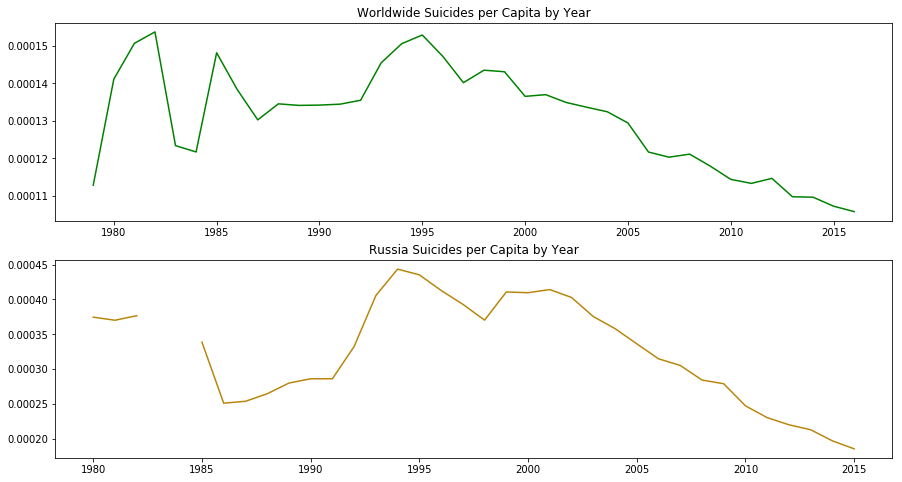

In [109]:
# create variables for the year and the per capita data points
y = 1979
pc = 0

# create empty lists and dictionary
listYear = list()
listPerCapita = list()
comboDict = {}

# remove warnings for warning that occurs when the float values are so small that it is equivalent to dividing 0 by 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # create a loop that terminates when y is greater than 2017 
    while y < 2017:
        # create a dataframe by using .loc to find all values that have the country equal to Russian Federation
        # and the year equal to the current value of y
        dfRussia = df.loc[(df['country'] == 'Russian Federation') & (df['year'] == y)]
        # assign the value of pc as the sum of the suicides_no divided by the sum of the poplulation number for the 
        # Ruassia dataframe
        pc = dfRussia['suicides_no'].sum()/dfRussia['population'].sum()
        # add the current value of y to the list of years
        listYear.append(y)
        # add the current value pc to the list of per capita suicides
        listPerCapita.append(pc)
        # combined the lists to create a dictionary
        comboDict = {'year': listYear,'perCapita':listPerCapita}
        # use the dictionary to create a dataframe
        dfYearPerCapita  = pd.DataFrame(comboDict)
        # increment the year
        y = y + 1   

# adjust the figure size
plt.figure(figsize = (15,8))

# create a subplot
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
# create a plot of the year and worldwide per capita suicides for the Year dataframe created above
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

# create a subplot
plt.subplot(2,1,2)
plt.title('Russia Suicides per Capita by Year')
# create a plot of the year and Russia per capita suicides for the Russia dataframe
plt.plot(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

We can see that the data for the Russian Federation spikes in 1994 and 1995 like the worldwide data and takes a downward trend, similar to the worldwide data, but more dramatically.

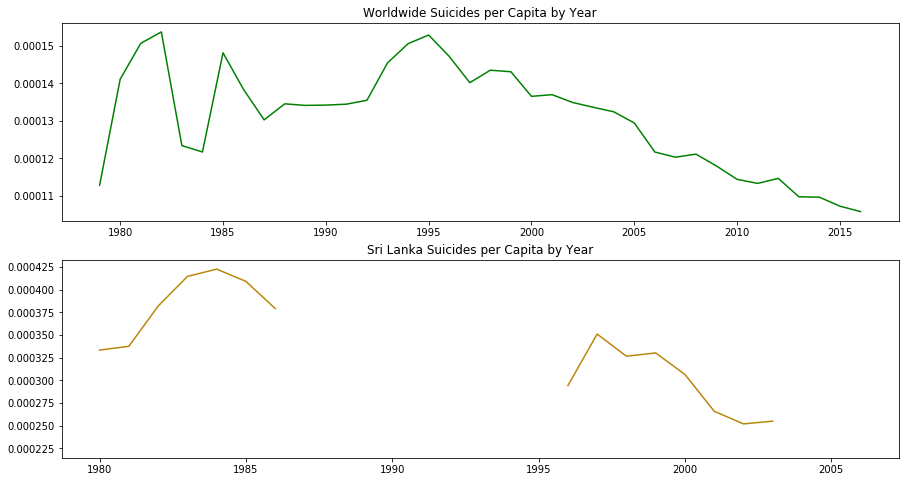

In [110]:
# create variables for the year and the per capita data points
y = 1979
pc = 0

# create empty lists and dictionary
listYear = list()
listPerCapita = list()
comboDict = {}

# remove warnings for warning that occurs when the float values are so small that it is equivalent to dividing 0 by 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # create a loop that terminates when y is greater than 2017 
    while y < 2017:
        # create a dataframe by using .loc to find all values that have the country equal to SriLanka
        # and the year equal to the current value of y
        dfSriLanka = df.loc[(df['country'] == 'Sri Lanka') & (df['year'] == y)]
        # assign the value of pc as the sum of the suicides_no divided by the sum of the poplulation number for the 
        # Sri Lanka dataframe
        pc = dfSriLanka['suicides_no'].sum()/dfSriLanka['population'].sum()
        # add the current value of y to the list of years
        listYear.append(y)
        # add the current value pc to the list of per capita suicides
        listPerCapita.append(pc)
        # combined the lists to create a dictionary
        comboDict = {'year': listYear,'perCapita':listPerCapita}
        # use the dictionary to create a dataframe
        dfYearPerCapita  = pd.DataFrame(comboDict)
        # increment the year
        y = y + 1   

# adjust the figure size
plt.figure(figsize = (15,8))

# create a subplot
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
# create a plot of the year and worldwide per capita suicides for the Year dataframe created above
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

# create a subplot
plt.subplot(2,1,2)
plt.title('Sri Lanka Suicides per Capita by Year')
# create a plot of the year and Sri Lanka per capita suicides for the Sri Lanka dataframe
plt.plot(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

It is difficult to accurately compare Sri Lanka to the worldwide data as there are so many missing years. This makes us wonder what would happen to the worldwide date if the missing years were included and if the data would be similar between Sri Lanka and the world. With the data we have, there is an overall downward trend for suicides per Capita for Sri Lanka.

## Country and Year Examination Summary

We can see from the comparrison of the data from the four countries with the highest per capita suicides by year and the worldwide data that it is possible that the overall downward trend in worldwide suicides per capita is likely related to the same downward trends in Lithuania, Hungary, the Russian Federation and Sri Lanka

## Important Note on Communism

Three of the top four countries in suicides per capita, Lithuania, Hungary and the Russian Federation, can have their high rate attributed to the fall of communism and subsequent changes in the economic and political climate. There are other countries that saw the fall of communism during the same period (1991-1992, with effects for some years after). These include Albania, Armenia, Azerbaijan,  Belarus, Bosnia and Herzegovina, Bulgaria, Croatia, the Czech Republic, Estonia, Kazakhstan, Kyrgyzstan, Latvia, Macedonia, the Republic of Moldova, Montenegro, Poland, Serbia, Slovenia, Tajikistan, Turkmenistan, the Ukraine and Uzbekistan. 

What will the plots look like if we separate the former communist countries from the rest of the worldwide suicides?

## Former Communist vs Remaining Worldwide Countries Suicides

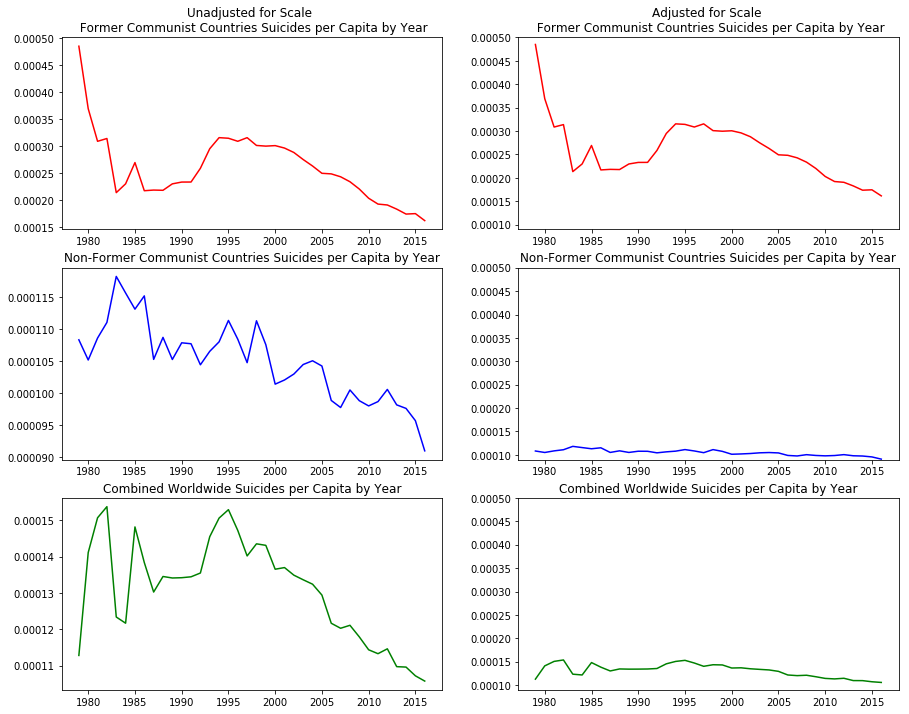

In [115]:
# create dataframes for each country that was formerly communist and associated with the USSR by using .loc to find all
# rows with the country value of the name of the country being created
dfAlbania = df.loc[df['country'] == "Albania"]
dfArmenia = df.loc[df['country'] == "Armenia"]
dfAzerbaijan = df.loc[df['country'] == "Azerbaijan"]
dfBelarus = df.loc[df['country'] == 'Belarus']
dfBosnia = df.loc[df['country'] == 'Bosnia and Herzegovina']
dfBulgaria = df.loc[df['country'] == 'Bulgaria']
dfCroatia = df.loc[df['country'] == 'Croatia']
dfCzech = df.loc[df['country'] == 'Czech Republic']
dfEstonia = df.loc[df['country'] == 'Estonia']
dfHungary = df.loc[df['country'] == 'Hungary']
dfKazakhstan = df.loc[df['country'] == 'Kazakhstan']
dfKyrgyzstan = df.loc[df['country'] == 'Kyrgyzstan']
dfLatvia = df.loc[df['country'] == 'Latvia']
dfLithuania = df.loc[df['country'] == 'Lithuania']
dfMacedonia = df.loc[df['country'] == 'TFYR Macedonia']
dfMoldova = df.loc[df['country'] == 'Republic of Moldova']
dfMontenegro = df.loc[df['country'] == 'Montenegro']
dfPoland = df.loc[df['country'] == 'Poland']
dfRussia = df.loc[df['country'] == 'Russian Federation']
dfSerbia = df.loc[df['country'] == 'Serbia']
dfSlovenia = df.loc[df['country'] == 'Slovenia']
dfTajikistan  = df.loc[df['country'] == 'Tajikistan']
dfTurkmenistan  = df.loc[df['country'] == 'Turkmenistan']
dfUkraine = df.loc[df['country'] == 'Ukraine']
dfUzbekistan = df.loc[df['country'] == 'Uzbekistan']

# create a list of dataframes from the dataframes of former communist countries
dfList = [dfAlbania, dfArmenia, dfBelarus, dfBosnia, dfBulgaria, dfCroatia, dfCzech, dfEstonia, dfHungary, dfKazakhstan, 
          dfKyrgyzstan, dfLatvia, dfLithuania, dfMacedonia, dfMoldova, dfMontenegro, dfPoland, dfRussia, dfSerbia, 
          dfSlovenia, dfTajikistan, dfTurkmenistan, dfUkraine, dfUzbekistan]

# combined all of the dataframes in the list to create one dataframe
dfCommunism = pd.concat(dfList)

# group the data of the communist countries by year and then sum the data
dfCommunismYear = dfCommunism.groupby(['year']).sum()
# reset the index for the Communist Year dataframe so that 'year' is included as the name of a column
dfCommunismYear = dfCommunismYear.reset_index()
# recalculate the suicides per capita for the summed c0mmunist dataframe instead of the summed value of the per capita data
# from the original dataset
dfCommunismYear['perCapita'] = dfCommunismYear['suicides_no']/dfCommunismYear['population']

# create a dataframe from the original dataframe with the former communist countries removed
dfNonCommunist = pd.concat([df, dfCommunism]).drop_duplicates(keep=False)

# group the data of the non-communist countries by year and then sum the data
dfNonCommunistYear = dfNonCommunist.groupby(['year']).sum()
# reset the index for the non-Communist Year dataframe so that 'year' is included as the name of a column
dfNonCommunistYear = dfNonCommunistYear.reset_index()
# recalculate the suicides per capita for the summed non-c0mmunist year dataframe instead of the summed value 
# of the per capita data from the original dataset
dfNonCommunistYear['perCapita'] = dfNonCommunistYear['suicides_no']/dfNonCommunistYear['population']

# adjust the figure size
plt.figure(figsize = (15,12))

# create a subplot
plt.subplot(3,2,1)
plt.title('Unadjusted for Scale \n Former Communist Countries Suicides per Capita by Year')
# create a plot of the year and Communist Countries per capita suicides for the Communist dataframe
plt.plot(dfCommunismYear['year'], dfCommunismYear['perCapita'], color = 'red')

# create a subplot
plt.subplot(3,2,2)
plt.ylim([0.000090, 0.00050])
plt.title('Adjusted for Scale \n Former Communist Countries Suicides per Capita by Year')
# create a plot of the year and Communist Countries per capita suicides for the Communist dataframe with adjusted y-axis
plt.plot(dfCommunismYear['year'], dfCommunismYear['perCapita'], color = 'red')

# create a subplot
plt.subplot(3,2,3)
plt.title('Non-Former Communist Countries Suicides per Capita by Year')
# create a plot of the year and non-Communist Countries per capita suicides for the Communist dataframe
plt.plot(dfNonCommunistYear['year'], dfNonCommunistYear['perCapita'], color = "blue")

# create a subplot
plt.subplot(3,2,4)
plt.ylim([0.000090, 0.00050])
plt.title('Non-Former Communist Countries Suicides per Capita by Year')
plt.plot(dfNonCommunistYear['year'], dfNonCommunistYear['perCapita'], color = "blue")

# create a subplot
plt.subplot(3,2,5)
plt.title('Combined Worldwide Suicides per Capita by Year')
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

# create a subplot
plt.subplot(3,2,6)
plt.ylim([0.000090, 0.00050])
plt.title('Combined Worldwide Suicides per Capita by Year')
plt.plot(dfYear['year'], dfYear['perCapita'], color = "green")

When we initially look at the plots comparing former communist countries, non-former communist countries and the combined worldwide data, it looks as though all the different datasets peak in a similar way in the mid-1990s. However, when we look at the scales for the 3 different plots on the left have different y-axis scales (suicides per capita), with the former communist countries have a much larger maximum value. Because of this, we look at the plots on the right which are adjusted so that the y-axes are the same. We then see that there is a much larger range and variation from the former communist countries’ dataset.

We can also see that the large peak in the former communist countries is similar to the smaller peak for the worldwide data for the same period. The non-former communist countries dataset stays at a relatively steady rate, fluctuating less than 0.00005. These two observations would suggest that the data from the former communist countries is having a fairly significant effect on the combined worldwide suicides per capita rate.


## Futher Examination of the Data

There are many other questions that could be asked of this data. A few of them are:

-  Do certain countries have higher rates of suicide in men or women?
-  Does gender influence the rate of suicide for a given age group?
-  What countries most closely follow the worldwide trends?
-  Why did former communist countries have such a high rate of suicides per capita in 1979?
-  What conditions could possibly be causing the downward trend in worldwide suicides?

The last two explorations would require insite into the conditions locally and worldwide
